ACTIVIDAD 4.2 

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
#JALAR DATASET
df = pd.read_csv('NEW YORK_LIMPIO_sinnulos.csv') 
print(data.info())
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36322 non-null  int64  
 1   id                            36322 non-null  float64
 2   last_scraped                  36322 non-null  object 
 3   source                        36322 non-null  object 
 4   host_since                    36322 non-null  object 
 5   host_location                 36322 non-null  object 
 6   host_about                    36322 non-null  object 
 7   host_response_time            36322 non-null  object 
 8   host_response_rate            36322 non-null  object 
 9   host_acceptance_rate          36322 non-null  float64
 10  host_is_superhost             36322 non-null  object 
 11  host_picture_url              36322 non-null  object 
 12  host_neighbourhood            36322 non-null  object 
 13  h

Unnamed: 0                      0
id                              0
last_scraped                    0
source                          0
host_since                      0
host_location                   0
host_about                      0
host_response_time              0
host_response_rate              0
host_acceptance_rate            0
host_is_superhost               0
host_picture_url                0
host_neighbourhood              0
host_listings_count             0
host_total_listings_count       0
host_verifications              0
host_has_profile_pic            0
host_identity_verified          0
neighbourhood                   0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms_text                  0
bedrooms                        0
beds                            0
price         

<Figure size 1500x800 with 0 Axes>

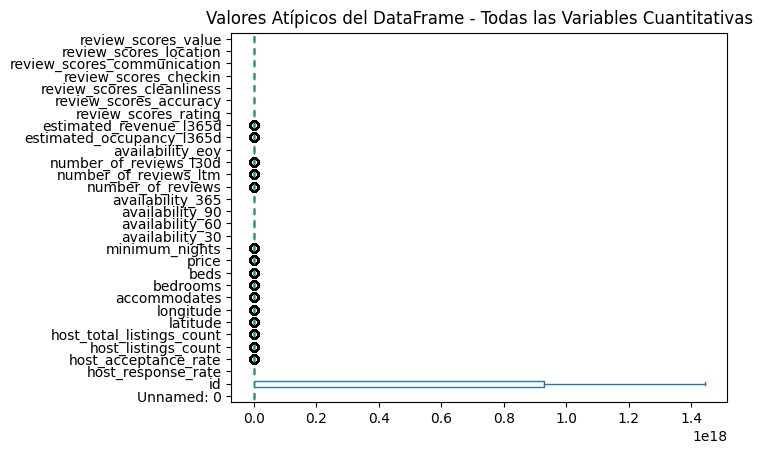

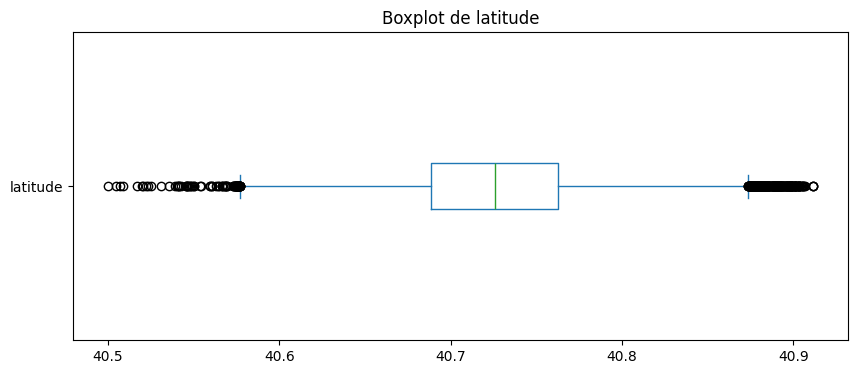

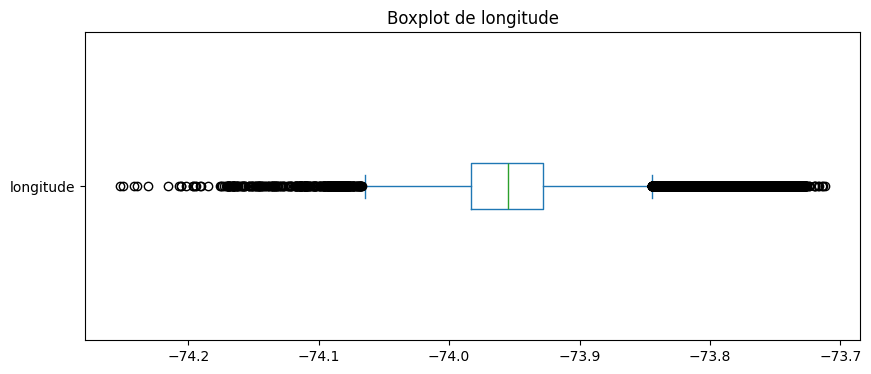

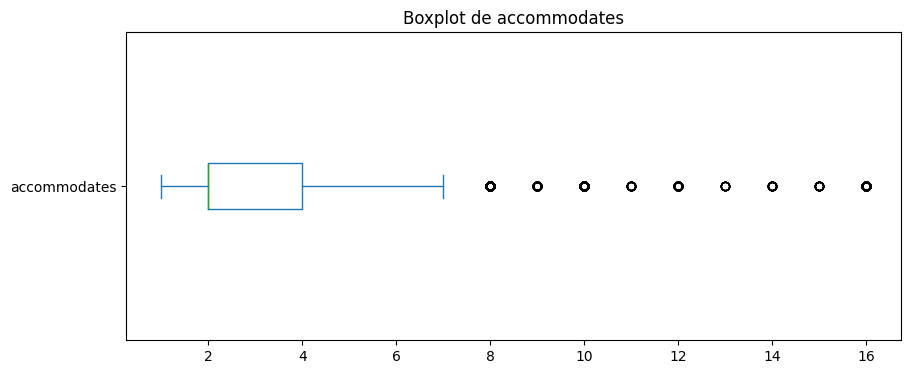

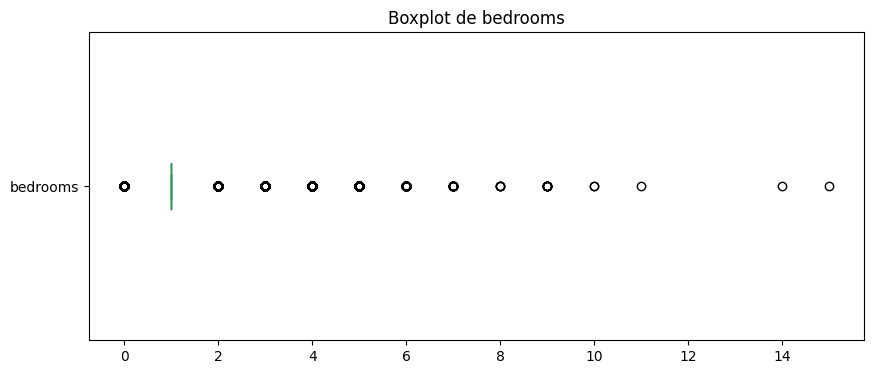

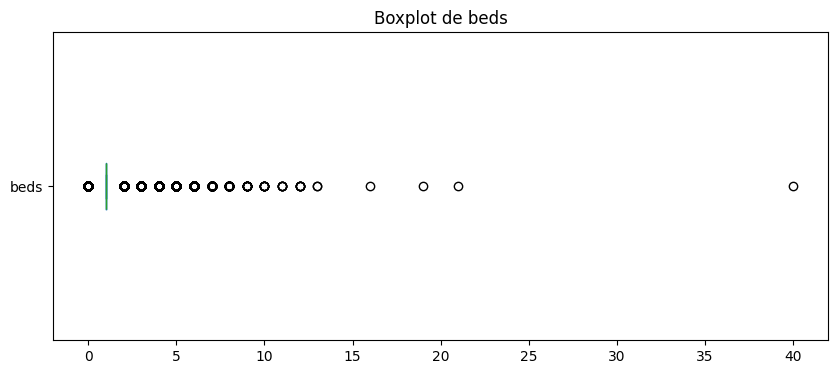

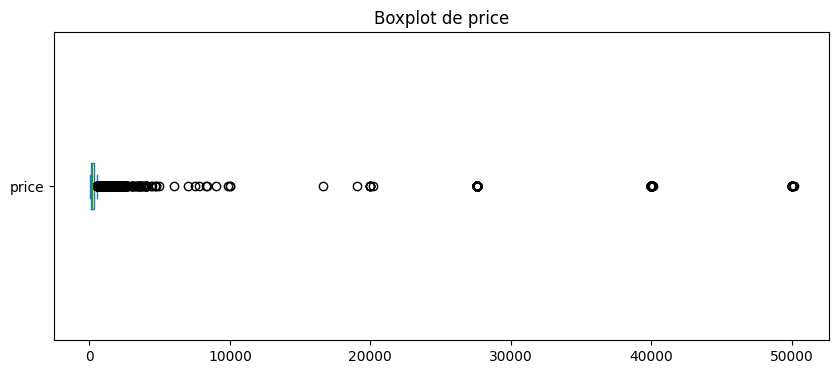

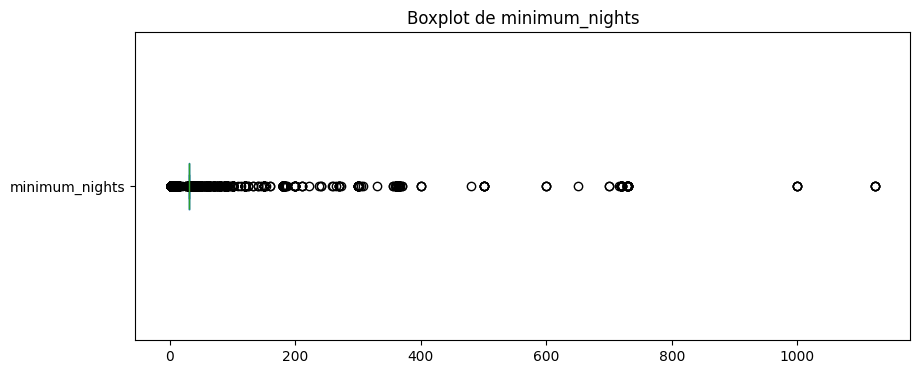

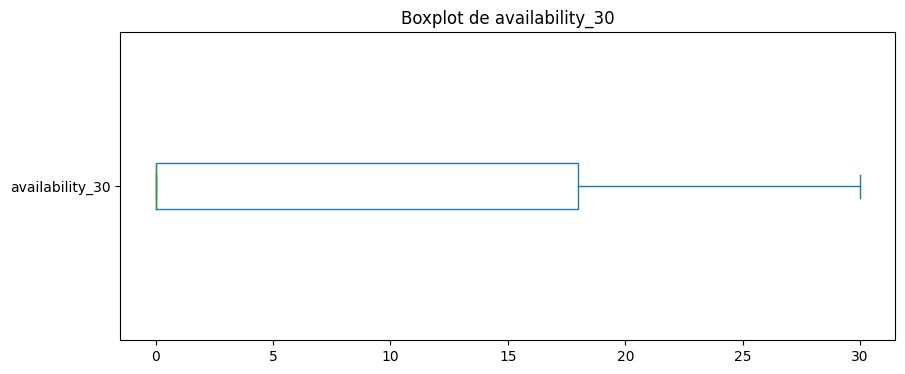

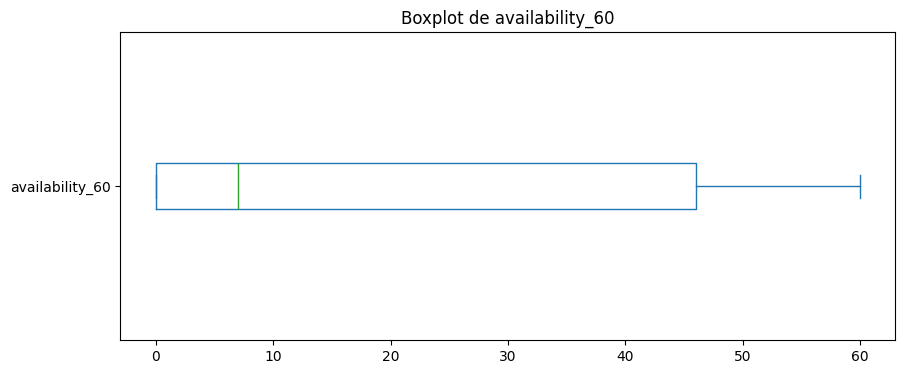

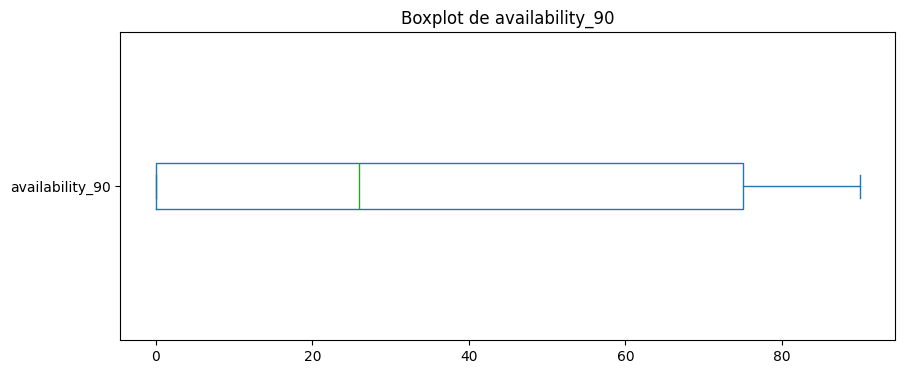

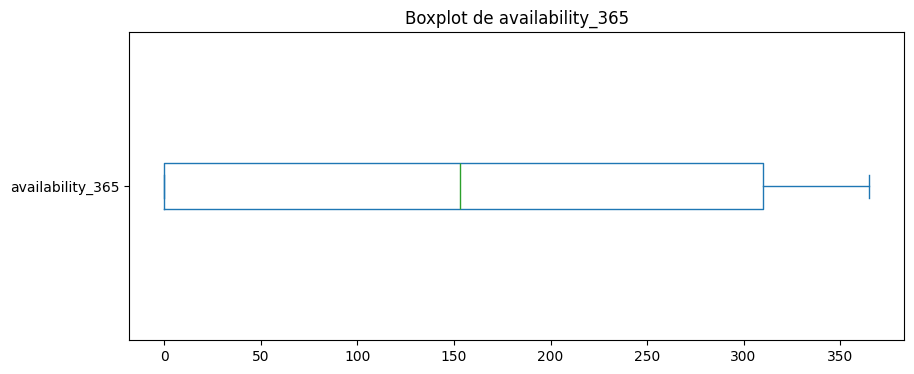

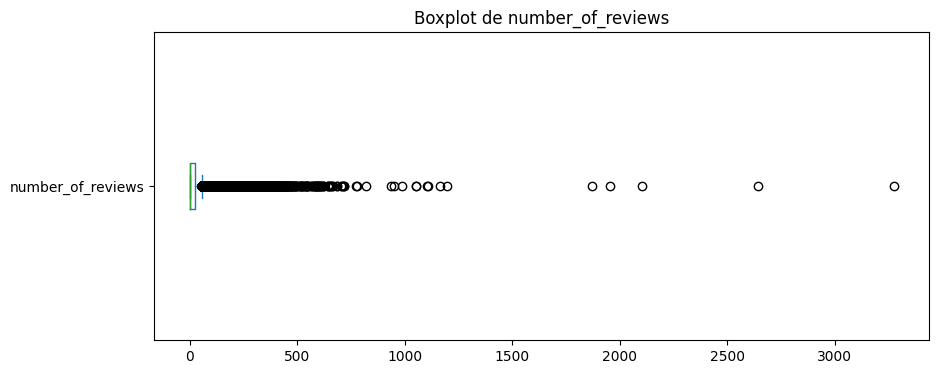

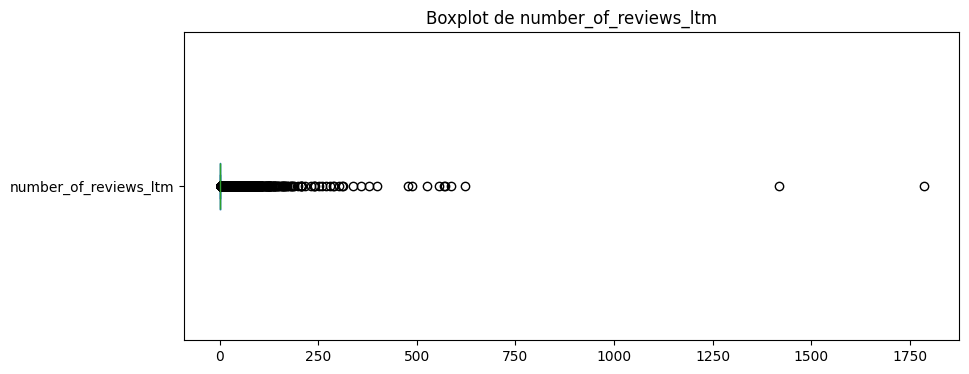

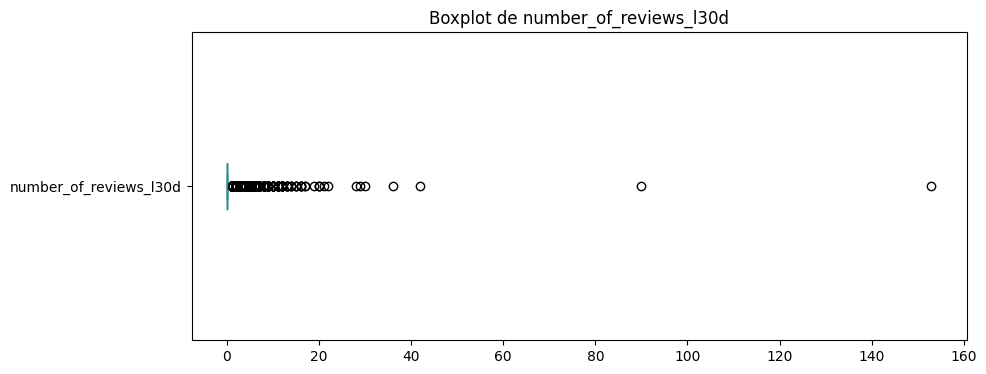

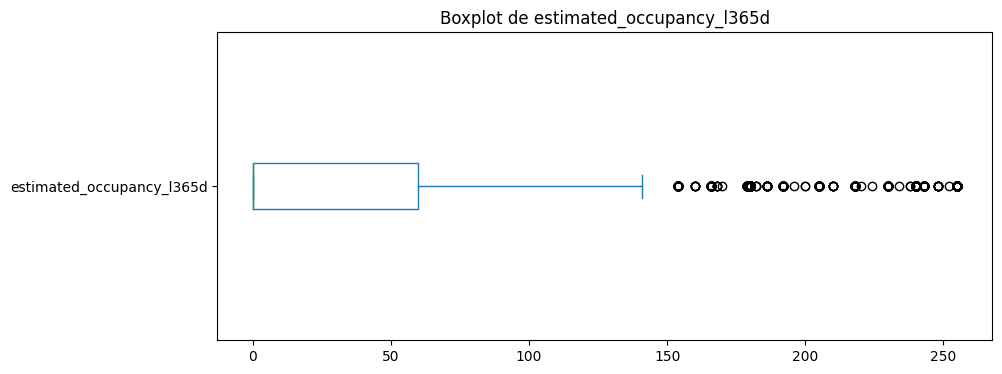

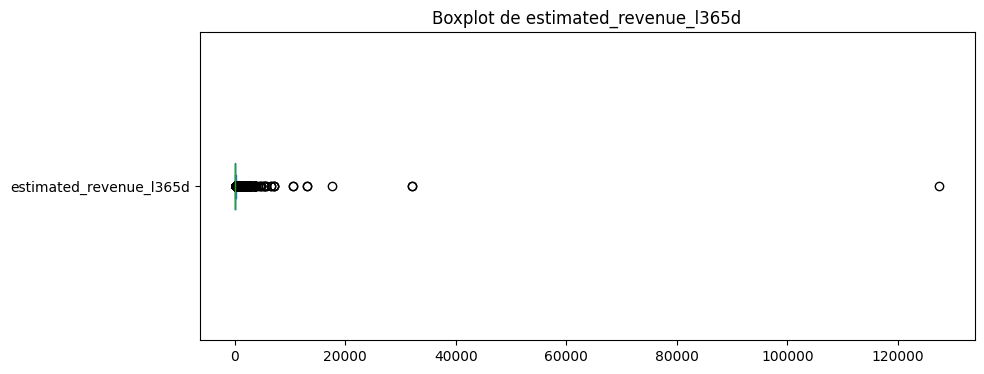

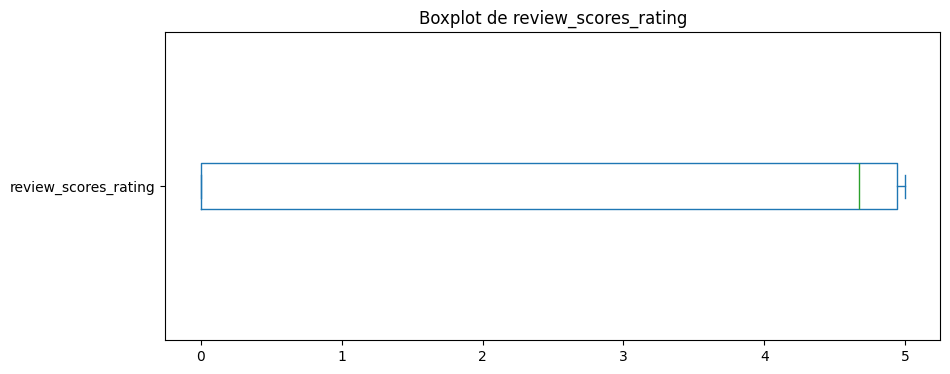

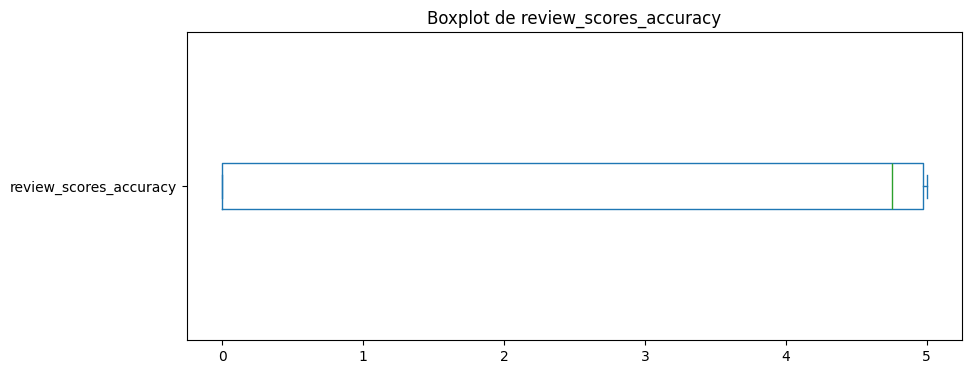

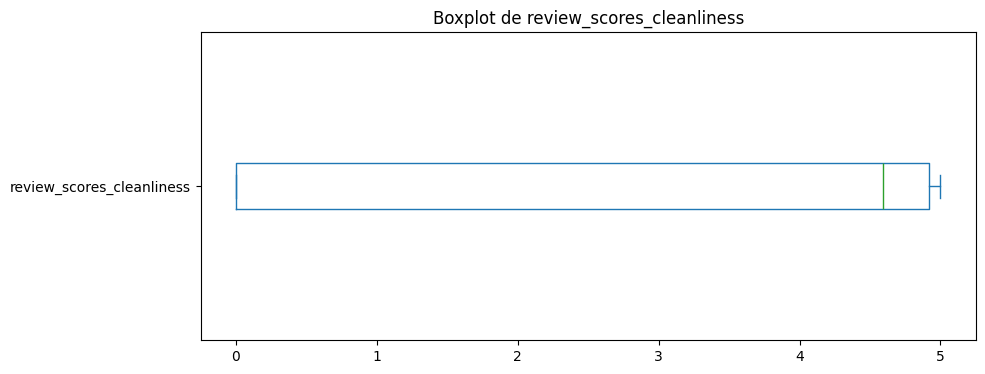

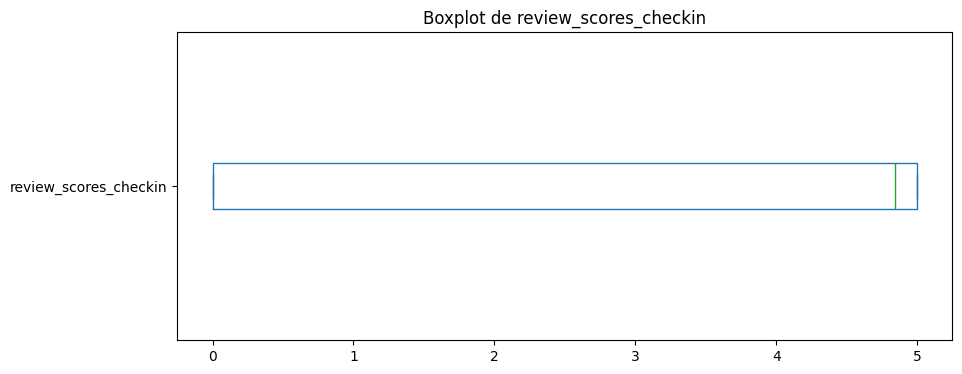

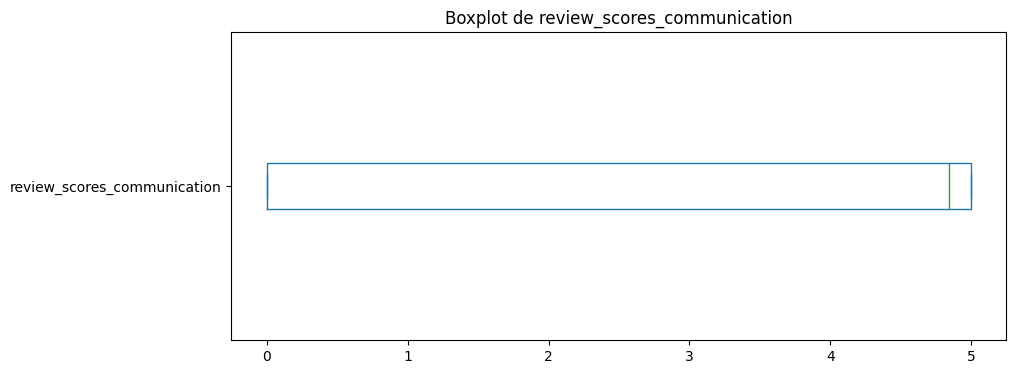

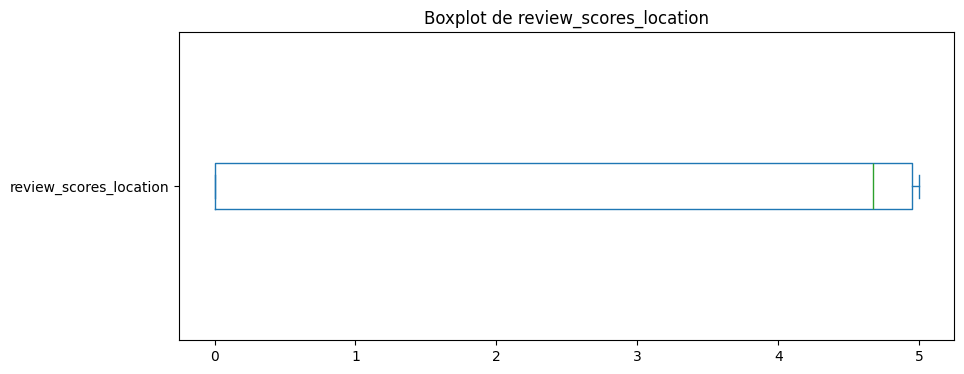

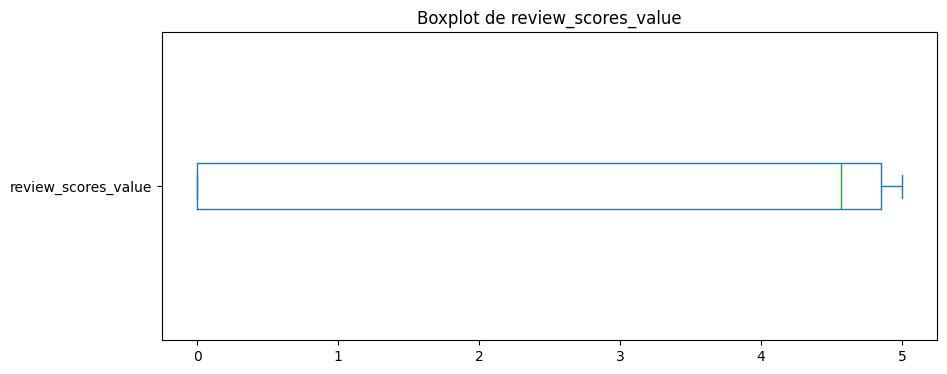

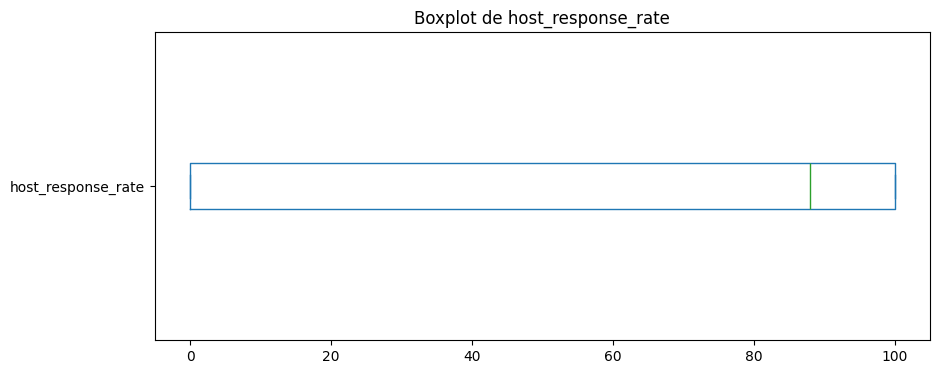

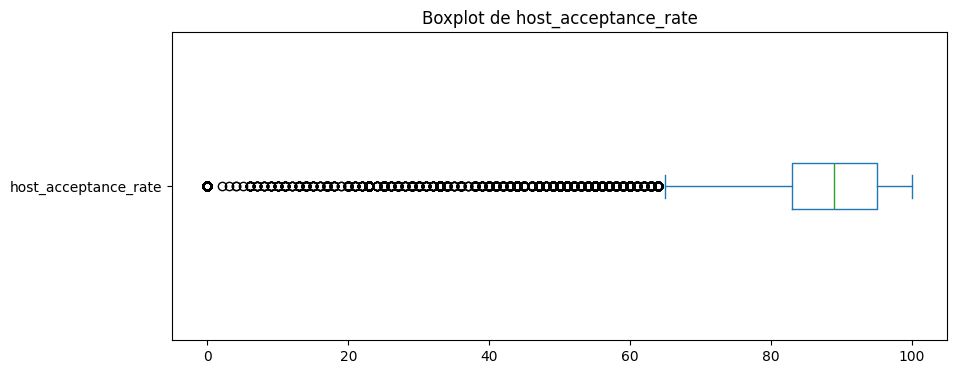

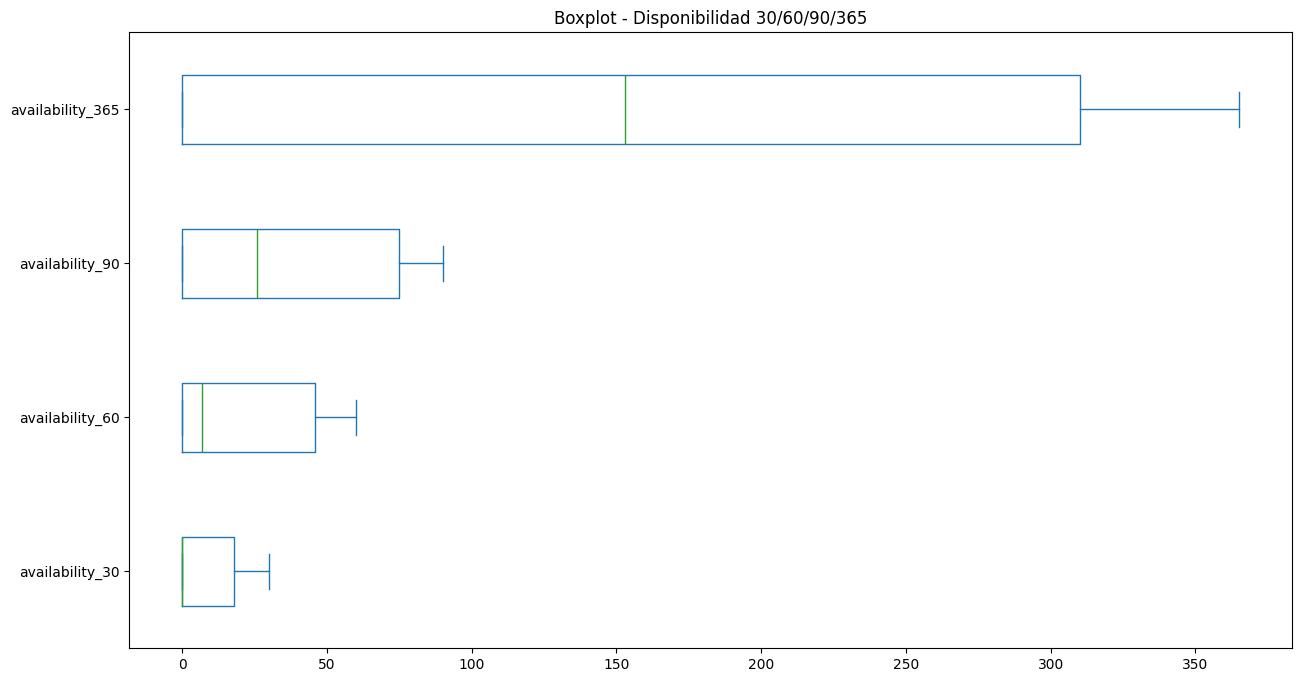

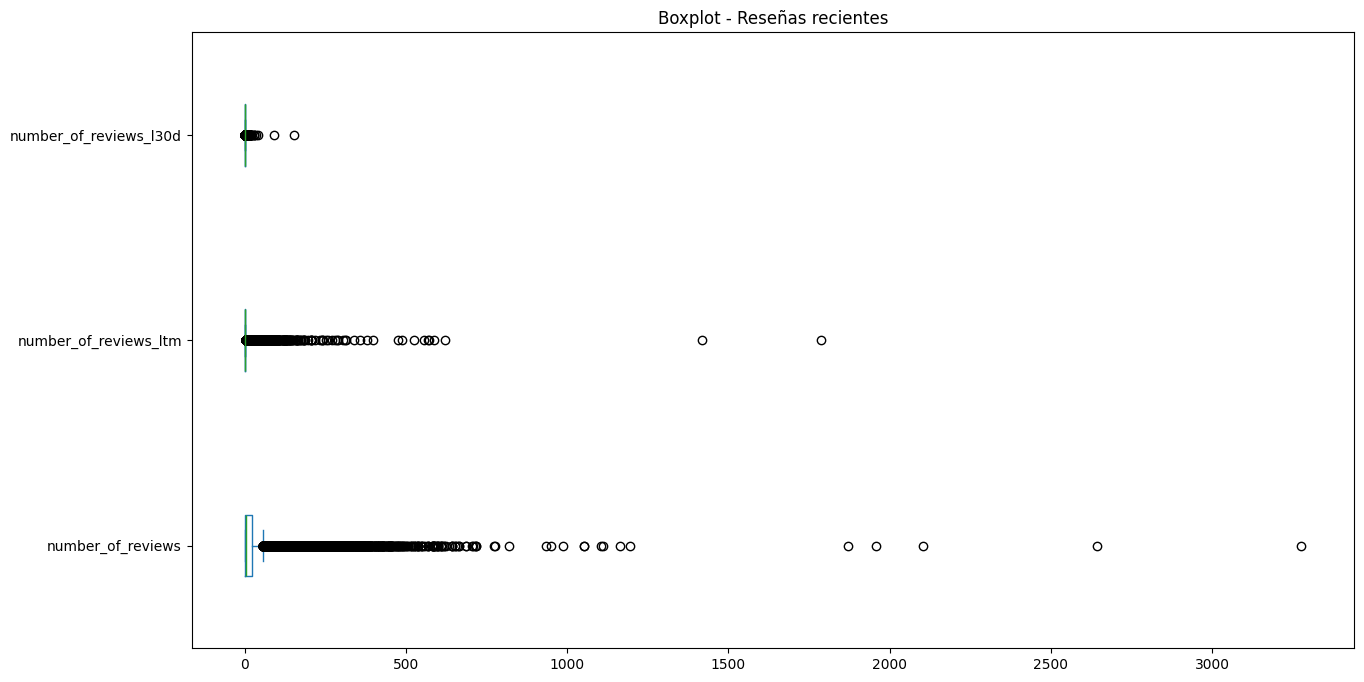

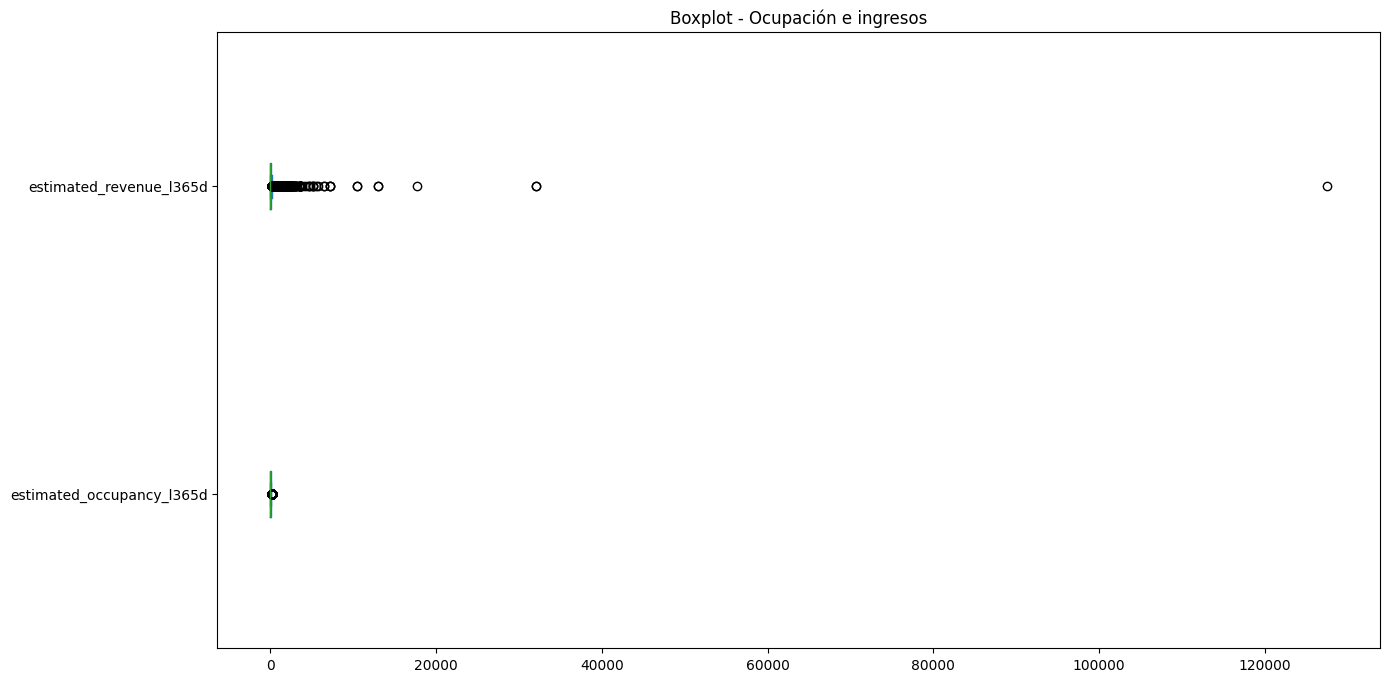

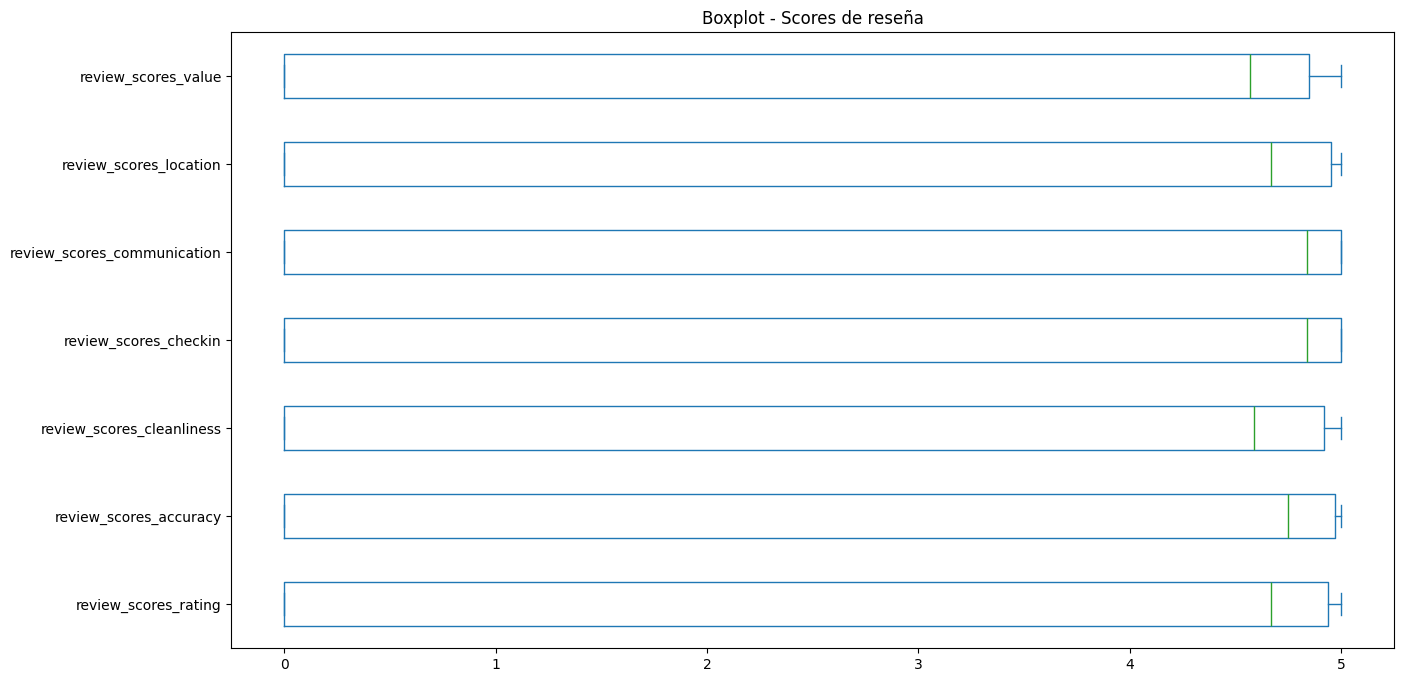

In [71]:
#Valores atitpicos del dataframe 
# Limpiar columnas de porcentaje si existen
for pct_col in ["host_response_rate", "host_acceptance_rate"]:
    if pct_col in df.columns:
        df[pct_col] = (
            df[pct_col]
            .astype(str)
            .str.replace("%", "", regex=False)
            .str.strip()
        )
        df[pct_col] = pd.to_numeric(df[pct_col], errors="coerce")

# Limpiar columna "price" si tiene símbolos
if "price" in df.columns and not pd.api.types.is_numeric_dtype(df["price"]):
    df["price"] = (
        df["price"]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
    df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Solo variables numéricas
cuantitativas = df.select_dtypes(include=["number"]).copy()

# ===== Boxplot general =====
plt.figure(figsize=(15, 8))
cuantitativas.plot(kind="box", vert=False)
plt.title("Valores Atípicos del DataFrame - Todas las Variables Cuantitativas")
plt.show()

# ===== Boxplots individuales =====
cols_individuales = [
    "latitude", "longitude",
    "accommodates", "bedrooms", "beds",
    "price", "minimum_nights",
    "availability_30", "availability_60", "availability_90", "availability_365",
    "number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d",
    "estimated_occupancy_l365d", "estimated_revenue_l365d",
    "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
    "review_scores_checkin", "review_scores_communication",
    "review_scores_location", "review_scores_value",
    "host_response_rate", "host_acceptance_rate"
]

for col in cols_individuales:
    if col in cuantitativas.columns:
        cuantitativas[col].plot(kind="box", vert=False, figsize=(10, 4))
        plt.title(f"Boxplot de {col}")
        plt.show()

# ===== Boxplots por grupos =====
grupos = {
    "Disponibilidad 30/60/90/365": ["availability_30", "availability_60", "availability_90", "availability_365"],
    "Reseñas recientes": ["number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d"],
    "Ocupación e ingresos": ["estimated_occupancy_l365d", "estimated_revenue_l365d"],
    "Scores de reseña": [
        "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
        "review_scores_checkin", "review_scores_communication",
        "review_scores_location", "review_scores_value"
    ]
}

for titulo, cols in grupos.items():
    cols_presentes = [c for c in cols if c in cuantitativas.columns]
    if cols_presentes:
        cuantitativas[cols_presentes].plot(kind="box", vert=False, figsize=(15, 8))
        plt.title(f"Boxplot - {titulo}")
        plt.show()


DESVIACIÓN ESTANDAR 

In [106]:

# Solo columnas int64 a cuantitativas; TODO lo demás a cualitativas
idx_cuanti = [i for i, dt in enumerate(df.dtypes) if str(dt) == "int64"]
idx_cuali  = [i for i in range(df.shape[1]) if i not in idx_cuanti]

cuantitativas = df.iloc[:, idx_cuanti].copy()
cualitativas  = df.iloc[:, idx_cuali].copy()

# Chequeo rápido
print("dtypes cuantitativas:", cuantitativas.dtypes.unique())
print("resumen dtypes cualitativas:\n", cualitativas.dtypes.value_counts())


dtypes cuantitativas: [dtype('int64')]
resumen dtypes cualitativas:
 object     22
float64    15
bool        2
Name: count, dtype: int64


In [107]:
cualitativas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            36322 non-null  float64
 1   last_scraped                  36322 non-null  object 
 2   source                        36322 non-null  object 
 3   host_since                    36322 non-null  object 
 4   host_location                 36322 non-null  object 
 5   host_about                    36322 non-null  object 
 6   host_response_time            36322 non-null  object 
 7   host_acceptance_rate          36322 non-null  float64
 8   host_is_superhost             36322 non-null  object 
 9   host_picture_url              36322 non-null  object 
 10  host_neighbourhood            36322 non-null  object 
 11  host_verifications            36322 non-null  object 
 12  host_has_profile_pic          36322 non-null  bool   
 13  h

In [108]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 36322 non-null  int64
 1   host_response_rate         36322 non-null  int64
 2   host_listings_count        36322 non-null  int64
 3   host_total_listings_count  36322 non-null  int64
 4   accommodates               36322 non-null  int64
 5   minimum_nights             36322 non-null  int64
 6   availability_30            36322 non-null  int64
 7   availability_60            36322 non-null  int64
 8   availability_90            36322 non-null  int64
 9   availability_365           36322 non-null  int64
 10  number_of_reviews          36322 non-null  int64
 11  number_of_reviews_ltm      36322 non-null  int64
 12  number_of_reviews_l30d     36322 non-null  int64
 13  availability_eoy           36322 non-null  int64
 14  estimated_occupancy_l3

In [109]:
y = cuantitativas

Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()

print("Límite superior permitido:\n", Limite_Superior)
print("\nLímite inferior permitido:\n", Limite_Inferior)



Límite superior permitido:
 Unnamed: 0                   49616.707726
host_response_rate             197.924319
host_listings_count           3143.386351
host_total_listings_count     4062.309011
accommodates                     8.426991
minimum_nights                 134.538728
availability_30                 44.134138
availability_60                 92.920776
availability_90                143.306575
availability_365               595.615882
number_of_reviews              228.999208
number_of_reviews_ltm           64.261780
number_of_reviews_l30d           4.752626
availability_eoy               327.100645
estimated_occupancy_l365d      304.245117
dtype: float64

Límite inferior permitido:
 Unnamed: 0                  -13295.707726
host_response_rate             -89.963083
host_listings_count          -2655.260972
host_total_listings_count    -3381.247616
accommodates                    -2.923220
minimum_nights                 -76.127296
availability_30                -26.683888
avai

In [110]:
# Outliers se convierten en nulos 
df3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 36322 non-null  int64  
 1   host_response_rate         36322 non-null  int64  
 2   host_listings_count        34898 non-null  float64
 3   host_total_listings_count  34694 non-null  float64
 4   accommodates               35823 non-null  float64
 5   minimum_nights             36044 non-null  float64
 6   availability_30            36322 non-null  int64  
 7   availability_60            36322 non-null  int64  
 8   availability_90            36322 non-null  int64  
 9   availability_365           36322 non-null  int64  
 10  number_of_reviews          35616 non-null  float64
 11  number_of_reviews_ltm      36020 non-null  float64
 12  number_of_reviews_l30d     35766 non-null  float64
 13  availability_eoy           36322 non-null  int

In [111]:
df_clean = df3.copy()

# Rellenar NaN solo en columnas numéricas con la media redondeada a 1 decimal
df_clean = df_clean.fillna(df3.select_dtypes(include='number').mean().round(1))

df_clean


,Unnamed: 0,host_response_rate,host_listings_count,host_total_listings_count,accommodates,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,estimated_occupancy_l365d
0,0,100,6.0,13.0,2.0,30.0,12,42,72,347,9.0,0.0,0.0,180,0
1,1,94,7.0,9.0,1.0,30.0,0,7,37,312,49.0,0.0,0.0,145,0
2,2,0,1.0,5.0,4.0,30.0,0,29,37,80,4.0,0.0,0.0,80,0
3,3,100,1.0,1.0,3.0,30.0,0,0,6,219,196.0,4.0,1.0,52,240
4,4,91,2.0,2.0,1.0,30.0,1,1,1,2,1.0,0.0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36317,36317,100,4.0,4.0,2.0,30.0,26,56,86,361,0.0,0.0,0.0,194,0
36318,36318,0,1.0,2.0,2.0,30.0,30,60,90,285,0.0,0.0,0.0,118,0
36319,36319,89,2.0,2.0,1.0,30.0,3,33,63,198,0.0,0.0,0.0,171,0
36320,36320,100,11.0,13.0,4.0,30.0,12,42,72,347,0.0,0.0,0.0,180,0


In [112]:
valores_nulos=df_clean.isnull().sum()
valores_nulos

Unnamed: 0                   0
host_response_rate           0
host_listings_count          0
host_total_listings_count    0
accommodates                 0
minimum_nights               0
availability_30              0
availability_60              0
availability_90              0
availability_365             0
number_of_reviews            0
number_of_reviews_ltm        0
number_of_reviews_l30d       0
availability_eoy             0
estimated_occupancy_l365d    0
dtype: int64

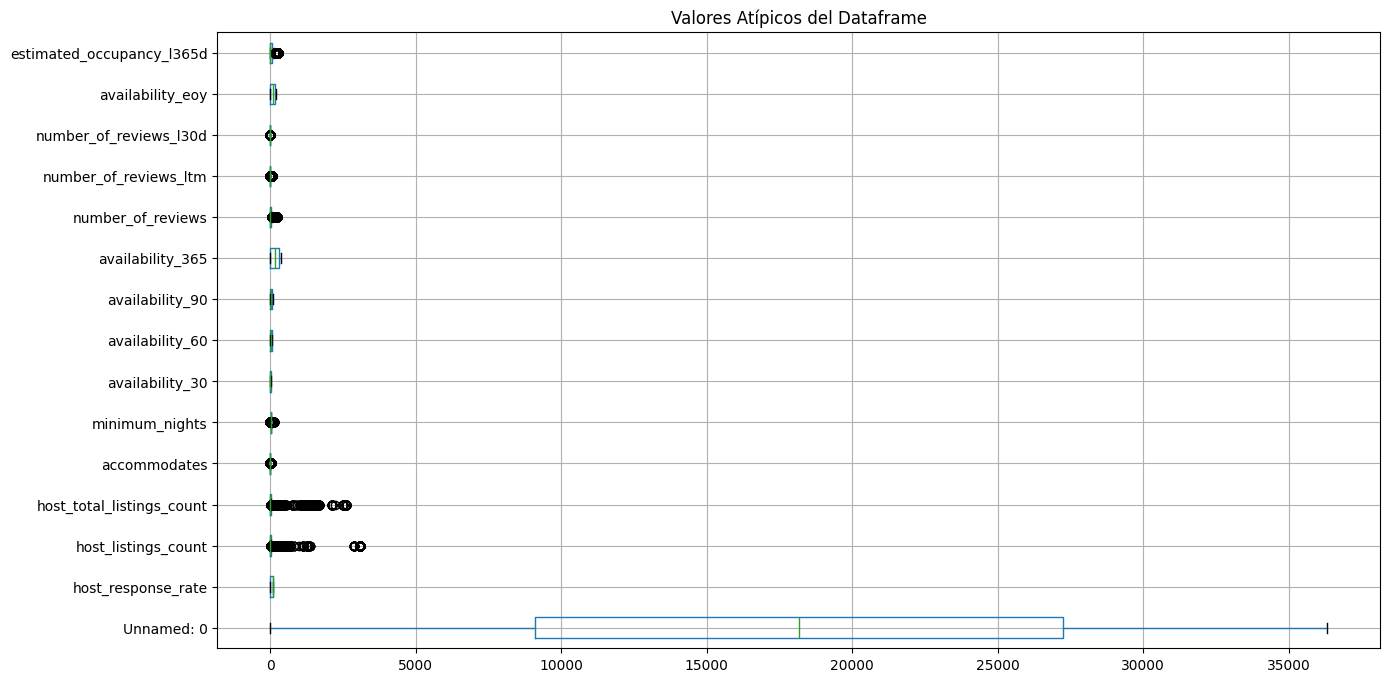

In [114]:
##comprobacion dif 

fig = plt.figure(figsize =(15, 8))
df_clean.boxplot(vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [116]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios = pd.concat([cualitativas, data_clean], axis=1)
Datos_limpios

,id,last_scraped,source,host_since,host_location,host_about,host_response_time,host_acceptance_rate,host_is_superhost,host_picture_url,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy
0,2.539000e+03,2025-06-17,city scrape,2008-09-07,"New York, NY",Educated professional living in Brooklyn. I l...,within a few hours,80.0,f,https://a0.muscache.com/im/pictures/user/User/...,...,9.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,4.89,4.88
1,2.595000e+03,2025-06-17,city scrape,2008-09-09,"Woodstock, NY",A New Yorker since 2000! My passion is creatin...,within a few hours,24.0,f,https://a0.muscache.com/im/pictures/user/50fc5...,...,49.0,0.0,0.0,145.0,0.0,0.0,NaN,NaN,4.68,4.73
2,5.136000e+03,2025-06-17,city scrape,2009-02-03,"New York, NY","Rebecca is an artist/designer, and Henoch is i...",unknown,100.0,f,https://a0.muscache.com/im/users/7378/profile_...,...,4.0,0.0,0.0,80.0,0.0,0.0,NaN,NaN,4.75,4.75
3,6.848000e+03,2025-06-17,city scrape,2009-05-06,"New York, NY",We love to travel. When we travel we like to s...,within an hour,100.0,t,https://a0.muscache.com/im/users/15991/profile...,...,NaN,4.0,NaN,52.0,NaN,232.8,NaN,NaN,4.59,4.60
4,6.872000e+03,2025-06-17,previous scrape,2009-05-07,"New York, NY",A former life in fashion and wellness has left...,within a day,33.0,f,https://a0.muscache.com/im/pictures/user/d865a...,...,1.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,5.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36317,1.444360e+18,2025-06-17,city scrape,2021-06-24,unknown,unknown,within an hour,80.0,f,https://a0.muscache.com/defaults/user_pic-225x...,...,0.0,0.0,0.0,194.0,0.0,0.0,NaN,NaN,0.00,0.00
36318,1.444370e+18,2025-06-17,city scrape,2012-04-05,"New York, United States",Scottish guy living in Brooklyn. Beautiful ap...,unknown,89.0,f,https://a0.muscache.com/im/users/2076525/profi...,...,0.0,0.0,0.0,118.0,0.0,0.0,NaN,NaN,0.00,0.00
36319,1.444470e+18,2025-06-17,city scrape,2015-08-21,"New York, NY",I'm an actor and writer who enjoys traveling t...,within an hour,50.0,f,https://a0.muscache.com/im/pictures/user/User/...,...,0.0,0.0,0.0,171.0,0.0,0.0,NaN,NaN,0.00,0.00
36320,1.444500e+18,2025-06-17,city scrape,2025-02-07,unknown,unknown,within an hour,100.0,f,https://a0.muscache.com/im/pictures/user/User/...,...,0.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,0.00,0.00


In [118]:
df_clean.to_csv("NEWYORK_Sin_Atipicos_Desv.csv")

PROCEDIMIENTO DE CUANTILES ESTO NO LE HAGA CASO PROFE 

<Figure size 1500x800 with 0 Axes>

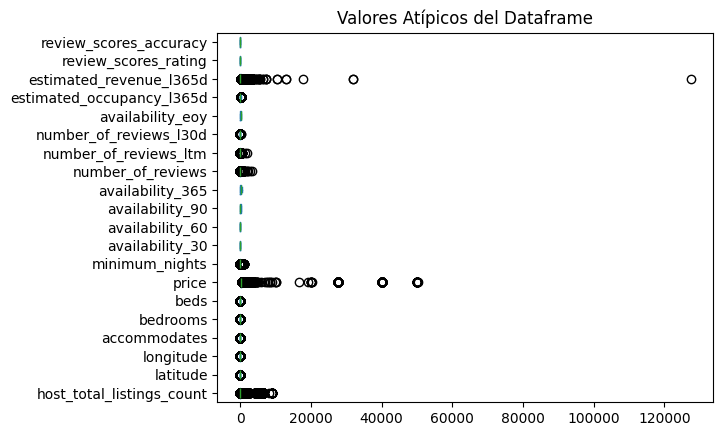

In [78]:
# Boxplot general después de limpiar outliers
plt.close('all')  # Cerrar figuras anteriores
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
#cuantitativas['subtotal_ventas_alimentos_bebidas'].plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [79]:
for col in cuantitativas.select_dtypes(include='number'):
    q1 = cuantitativas[col].quantile(0.25)
    q3 = cuantitativas[col].quantile(0.75)
    iqr = q3 - q1

    limite_inf = q1 - 1.5*iqr
    limite_sup = q3 + 1.5*iqr

    print(f"{col} → Límite inferior: {limite_inf}, Límite superior: {limite_sup}")


host_total_listings_count → Límite inferior: -18.5, Límite superior: 33.5
latitude → Límite inferior: 40.57718125, Límite superior: 40.873451249999995
longitude → Límite inferior: -74.06637125, Límite superior: -73.84474125
accommodates → Límite inferior: -1.0, Límite superior: 7.0
bedrooms → Límite inferior: 1.0, Límite superior: 1.0
beds → Límite inferior: 1.0, Límite superior: 1.0
price → Límite inferior: -132.00760966875555, Límite superior: 569.3460161145927
minimum_nights → Límite inferior: 30.0, Límite superior: 30.0
availability_30 → Límite inferior: -27.0, Límite superior: 45.0
availability_60 → Límite inferior: -69.0, Límite superior: 115.0
availability_90 → Límite inferior: -112.5, Límite superior: 187.5
availability_365 → Límite inferior: -465.0, Límite superior: 775.0
number_of_reviews → Límite inferior: -34.5, Límite superior: 57.5
number_of_reviews_ltm → Límite inferior: -1.5, Límite superior: 2.5
number_of_reviews_l30d → Límite inferior: 0.0, Límite superior: 0.0
availa

In [80]:
#Obtenemos datos limpios del Dataframe
df3_iqr = cuantitativas.copy()

for col in cuantitativas.select_dtypes(include='number'):
    q1 = cuantitativas[col].quantile(0.25)
    q3 = cuantitativas[col].quantile(0.75)
    iqr = q3 - q1

    li, ls = q1 - 1.5*iqr, q3 + 1.5*iqr
    df3_iqr = df3_iqr[(df3_iqr[col] >= li) & (df3_iqr[col] <= ls)]

df3_iqr


,source,host_since,host_is_superhost,host_picture_url,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy
0,city scrape,2008-09-07,f,https://a0.muscache.com/im/pictures/user/User/...,13,"['email', 'phone']",True,True,Neighborhood highlights,Kensington,...,9,0,0,180,0,0.0,2015-12-04,2018-10-19,4.89,4.88
4,previous scrape,2009-05-07,f,https://a0.muscache.com/im/pictures/user/d865a...,2,"['email', 'phone', 'work_email']",True,False,Neighborhood highlights,East Harlem,...,1,0,0,2,0,0.0,2022-06-05,2022-06-05,5.00,5.00
6,previous scrape,2009-05-15,f,https://a0.muscache.com/im/users/17297/profile...,2,"['email', 'phone', 'work_email']",True,True,Neighborhood highlights,Williamsburg,...,13,0,0,0,0,0.0,2010-08-17,2022-09-12,4.91,5.00
9,previous scrape,2010-05-20,f,https://a0.muscache.com/im/users/128806/profil...,2,"['email', 'phone']",True,True,Neighborhood highlights,East Village,...,37,0,0,0,0,0.0,2011-02-27,2023-09-03,4.81,4.92
10,previous scrape,2010-03-26,f,https://a0.muscache.com/im/users/99212/profile...,3,"['email', 'phone']",True,True,Neighborhood highlights,Greenwich Village,...,9,0,0,0,0,0.0,2010-12-07,2019-07-31,4.88,4.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36314,city scrape,2014-07-27,t,https://a0.muscache.com/im/pictures/user/6177c...,4,"['email', 'phone']",True,True,No especificado,Harlem,...,0,0,0,153,0,0.0,2000-01-19,2030-06-19,0.00,0.00
36316,city scrape,2013-08-15,t,https://a0.muscache.com/im/pictures/user/46a55...,3,"['email', 'phone']",True,True,No especificado,Upper West Side,...,0,0,0,198,0,0.0,2000-01-19,2030-06-19,0.00,0.00
36317,city scrape,2021-06-24,f,https://a0.muscache.com/defaults/user_pic-225x...,4,['phone'],False,True,No especificado,Lower East Side,...,0,0,0,194,0,0.0,2000-01-19,2030-06-19,0.00,0.00
36318,city scrape,2012-04-05,f,https://a0.muscache.com/im/users/2076525/profi...,2,"['email', 'phone']",True,True,No especificado,Fort Greene,...,0,0,0,118,0,0.0,2000-01-19,2030-06-19,0.00,0.00


In [81]:
#checar los nulos
valores_nulos=df3_iqr.isnull().sum()
valores_nulos

source                          0
host_since                      0
host_is_superhost               0
host_picture_url                0
host_total_listings_count       0
host_verifications              0
host_has_profile_pic            0
host_identity_verified          0
neighbourhood                   0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms_text                  0
bedrooms                        0
beds                            0
price                           0
minimum_nights                  0
has_availability                0
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
calendar_last_scraped           0
number_of_reviews               0
number_of_reviews_ltm           0
number_of_revi

In [82]:
# Rellenar NaN solo en columnas numéricas con la mediana redondeada a 1 decimal
df4_iqr = df3_iqr.copy()

num = df4_iqr.select_dtypes(include='number').columns
df4_iqr[num] = df4_iqr[num].fillna(df4_iqr[num].median().round(1))
obj = df4_iqr.select_dtypes(exclude='number').columns
df4_iqr[obj] = df4_iqr[obj].fillna('Unknown')
df4_iqr

,source,host_since,host_is_superhost,host_picture_url,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy
0,city scrape,2008-09-07,f,https://a0.muscache.com/im/pictures/user/User/...,13,"['email', 'phone']",True,True,Neighborhood highlights,Kensington,...,9,0,0,180,0,0.0,2015-12-04,2018-10-19,4.89,4.88
4,previous scrape,2009-05-07,f,https://a0.muscache.com/im/pictures/user/d865a...,2,"['email', 'phone', 'work_email']",True,False,Neighborhood highlights,East Harlem,...,1,0,0,2,0,0.0,2022-06-05,2022-06-05,5.00,5.00
6,previous scrape,2009-05-15,f,https://a0.muscache.com/im/users/17297/profile...,2,"['email', 'phone', 'work_email']",True,True,Neighborhood highlights,Williamsburg,...,13,0,0,0,0,0.0,2010-08-17,2022-09-12,4.91,5.00
9,previous scrape,2010-05-20,f,https://a0.muscache.com/im/users/128806/profil...,2,"['email', 'phone']",True,True,Neighborhood highlights,East Village,...,37,0,0,0,0,0.0,2011-02-27,2023-09-03,4.81,4.92
10,previous scrape,2010-03-26,f,https://a0.muscache.com/im/users/99212/profile...,3,"['email', 'phone']",True,True,Neighborhood highlights,Greenwich Village,...,9,0,0,0,0,0.0,2010-12-07,2019-07-31,4.88,4.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36314,city scrape,2014-07-27,t,https://a0.muscache.com/im/pictures/user/6177c...,4,"['email', 'phone']",True,True,No especificado,Harlem,...,0,0,0,153,0,0.0,2000-01-19,2030-06-19,0.00,0.00
36316,city scrape,2013-08-15,t,https://a0.muscache.com/im/pictures/user/46a55...,3,"['email', 'phone']",True,True,No especificado,Upper West Side,...,0,0,0,198,0,0.0,2000-01-19,2030-06-19,0.00,0.00
36317,city scrape,2021-06-24,f,https://a0.muscache.com/defaults/user_pic-225x...,4,['phone'],False,True,No especificado,Lower East Side,...,0,0,0,194,0,0.0,2000-01-19,2030-06-19,0.00,0.00
36318,city scrape,2012-04-05,f,https://a0.muscache.com/im/users/2076525/profi...,2,"['email', 'phone']",True,True,No especificado,Fort Greene,...,0,0,0,118,0,0.0,2000-01-19,2030-06-19,0.00,0.00


In [83]:
#hacer un nuevo dataframe con los datos limpios
Datos_limpios = pd.concat([cualitativas, df4_iqr], axis=1)
Datos_limpios

,last_scraped,source,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,review_scores_checkin,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy
0,2025-06-17,city scrape,"New York, NY",Educated professional living in Brooklyn. I l...,within a few hours,100,80.0,Gravesend,6,5.00,...,9.0,0.0,0.0,180.0,0.0,0.0,2015-12-04,2018-10-19,4.89,4.88
1,2025-06-17,city scrape,"Woodstock, NY",A New Yorker since 2000! My passion is creatin...,within a few hours,94,24.0,Midtown,7,4.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-06-17,city scrape,"New York, NY","Rebecca is an artist/designer, and Henoch is i...",unknown,0,100.0,Greenwood Heights,1,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-06-17,city scrape,"New York, NY",We love to travel. When we travel we like to s...,within an hour,100,100.0,Williamsburg,1,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-06-17,previous scrape,"New York, NY",A former life in fashion and wellness has left...,within a day,91,33.0,East Harlem,2,5.00,...,1.0,0.0,0.0,2.0,0.0,0.0,2022-06-05,2022-06-05,5.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36317,2025-06-17,city scrape,unknown,unknown,within an hour,100,80.0,unknown,4,0.00,...,0.0,0.0,0.0,194.0,0.0,0.0,2000-01-19,2030-06-19,0.00,0.00
36318,2025-06-17,city scrape,"New York, United States",Scottish guy living in Brooklyn. Beautiful ap...,unknown,0,89.0,Fort Greene,1,0.00,...,0.0,0.0,0.0,118.0,0.0,0.0,2000-01-19,2030-06-19,0.00,0.00
36319,2025-06-17,city scrape,"New York, NY",I'm an actor and writer who enjoys traveling t...,within an hour,89,50.0,Crown Heights,2,0.00,...,0.0,0.0,0.0,171.0,0.0,0.0,2000-01-19,2030-06-19,0.00,0.00
36320,2025-06-17,city scrape,unknown,unknown,within an hour,100,100.0,Central LA,11,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# numéricas y categóricas (texto)
num = df_clean.select_dtypes(include="number").columns
txt = df_clean.select_dtypes(include=["object","string","category"]).columns

# imputación
df_clean[num] = df_clean[num].fillna(df_clean[num].median().round(1))

# aplicar operaciones de string por columna
df_clean[txt] = df_clean[txt].apply(
    lambda s: s.astype("string").fillna("unknown").str.strip().replace({"": "unknown"})
)

# chequeo
print(df_clean.isna().sum()[lambda s: s>0])


Series([], dtype: int64)


In [85]:
bool_cols = df_clean.select_dtypes(include="bool").columns
df_clean[bool_cols] = df_clean[bool_cols].fillna(False)

In [86]:
# Partir DESDE df_clean para garantizar mismo índice
num_cols = df_clean.select_dtypes(include="number").columns
obj_cols = df_clean.select_dtypes(exclude="number").columns

cualitativas_aligned   = df_clean[obj_cols].reset_index(drop=True)
cuantitativas_aligned  = df_clean[num_cols].reset_index(drop=True)

Datos_limpios = pd.concat([cualitativas_aligned, cuantitativas_aligned], axis=1)
valores_nulos = Datos_limpios.isna().sum()
print(valores_nulos[valores_nulos > 0]) 

Series([], dtype: int64)


In [87]:
#checar los nulos
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

source                          0
host_since                      0
host_is_superhost               0
host_picture_url                0
host_verifications              0
host_has_profile_pic            0
host_identity_verified          0
neighbourhood                   0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
bathrooms_text                  0
has_availability                0
calendar_last_scraped           0
first_review                    0
last_review                     0
host_total_listings_count       0
latitude                        0
longitude                       0
accommodates                    0
bedrooms                        0
beds                            0
price                           0
minimum_nights                  0
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
number_of_revi

In [88]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
Datos_limpios.to_csv("NEWYORK_Sin_Valores_Atipicos.csv")